In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import copy

# All dataset  files location goes here

In [3]:
dataset_locs = {
    'only local view': "/home/mayank/Videos/single-ring-road-with-light/SingleLaneIDM/LocalView10m/Results/dataset.pkl",
    "full access comm": "/home/mayank/Videos/single-ring-road-with-light/SingleLaneIDM/LocalView10Comm10/Results/dataset.pkl",
    "restriced access comm": "/home/mayank/Videos/single-ring-road-with-light/SingleLaneIDM/LocalView10Comm10_regs_4/Results/dataset.pkl"
}

print(dataset_locs)

{'only local view': '/home/mayank/Videos/single-ring-road-with-light/SingleLaneIDM/LocalView10m/Results/dataset.pkl', 'full access comm': '/home/mayank/Videos/single-ring-road-with-light/SingleLaneIDM/LocalView10Comm10/Results/dataset.pkl', 'restriced access comm': '/home/mayank/Videos/single-ring-road-with-light/SingleLaneIDM/LocalView10Comm10_regs_4/Results/dataset.pkl'}


# Read all Dataset

In [4]:
def readPKL(fname):
    
    with open(fname, "rb") as handle:
        data_dict = pickle.load(handle)
    
    return copy.deepcopy(data_dict)

In [6]:
data_dict = {}
for case in dataset_locs.keys():
    data_dict[case] = readPKL(dataset_locs[case])


# Plot Agent Avg Speed

In [17]:
agent_vel = {}

for case in dataset_locs.keys():
    
    global_vel_data = {}
    
    for density in data_dict[case]["data"].keys():
        vel_data = []
        
        for episode_num in data_dict[case]["data"][density].keys():
            episode_data = []
            
            for step in range(0, len(data_dict[case]["data"][density][episode_num]["agent_vel"])):
                episode_data.append(data_dict[case]["data"][density][episode_num]["agent_vel"][step])
            
            vel_data.append(episode_data)
        
        global_vel_data[density] = copy.deepcopy(vel_data)
    
    agent_vel[case] = global_vel_data

In [21]:
# Length of episodes

In [29]:
avg_speeds_case = {}
density_dict = {}

for case in agent_vel.keys():
    
    avg_speeds = []
    densities = []
    
    for density in agent_vel[case].keys():
        densities.append(density)
        
        speed_sum = 0.0
        elements_count = 0
        for episode in agent_vel[case][density]:
            for vel in episode:
                speed_sum += vel
                elements_count += 1
        
        avg_speeds.append((speed_sum / elements_count) * 3.6)
    
    avg_speeds_case[case] = copy.deepcopy(avg_speeds)
    density_dict[case] = copy.deepcopy(densities)

only local view
0.2
full access comm
0.2
restriced access comm
0.2


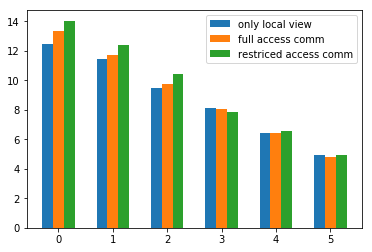

In [41]:
width = 0.2
start = -width

for case in avg_speeds_case.keys():
    print(case)
    plt.bar(np.arange(len(density_dict[case])) + start, avg_speeds_case[case], width=width, label=case)
    print(width)
    start += 0.2

plt.legend()

In [42]:
avg_speeds_case

{'only local view': [12.446297008033763,
  11.417813125968555,
  9.498130960157729,
  8.112635317876025,
  6.424125692778512,
  4.9684768144419795],
 'full access comm': [13.366112007273495,
  11.706761225454429,
  9.722025621818466,
  8.061674921284476,
  6.403695336064557,
  4.81228413849562],
 'restriced access comm': [14.042117122047257,
  12.38598751329333,
  10.428649264340455,
  7.8566281548150565,
  6.534450543154909,
  4.907721593608583]}